# Projeto 1 - CG

### Importando as bibliotecas necessárias

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

### Abrindo imagens e inserindo em uma lista

In [45]:
penguim_one = np.array(Image.open("P1.png").convert("RGB"))
penguim_two = np.array(Image.open("P2.png").convert("RGB"))
penguim_three = np.array(Image.open("P3.jpg").convert("RGB"))
penguim_four = np.array(Image.open("P4.png").convert("RGB"))

penguins = [penguim_one, penguim_two, penguim_three, penguim_four]
height_px = 650

### Juntar todas as imagens em uma única

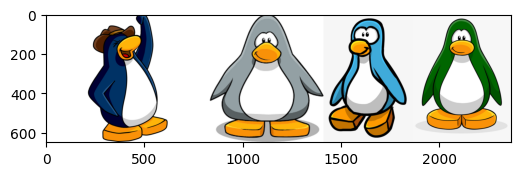

In [46]:
#padronizar altura
def resize(img, height):
    h, w = img.shape[:2]
    new_width = int(w * (height / h))
    return np.array(Image.fromarray(img).resize((new_width, height)))


resiezed_penguins = []
for penguim in range(len(penguins)):
    resiezed_penguins.append(resize(penguins[penguim], height_px))

#concatenar lado a lado
img = np.concatenate(resiezed_penguins, axis=1)

plt.figure(figsize=(6, 6))
plt.imshow(img)

### Trocando as cores dos pinguins para vermelho

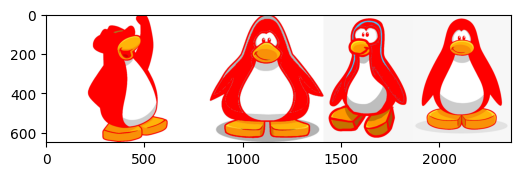

In [50]:
def change_color(img):
    color = np.array([255, 0, 0]) # cor azul
    new_image = img.copy()

    # mascara para detectar os pinguins
    mask = np.all(
        (img >= np.array([0, 0, 0])) & (img <= np.array([150, 180, 218])), axis=-1
    )
    new_image[mask] = color

    return new_image


unique_color_image = change_color(img)

plt.figure(figsize=(6, 6))
plt.imshow(unique_color_image)

### Aplicando o espelhamento

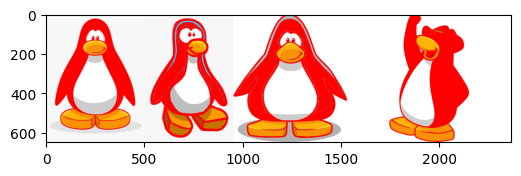

In [ ]:
def reflect(img):
    return img[:, ::-1]  # inverte em y


img_reflected = reflect(unique_color_image)

plt.figure(figsize=(6, 6))
plt.imshow(img_reflected)

### Recortando o pinguim favorito

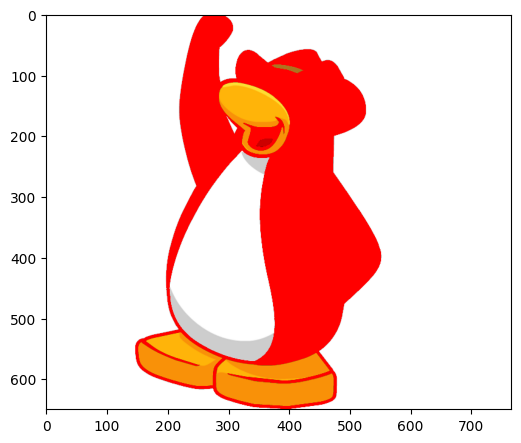

In [52]:
def crop(img: np.ndarray):
    return img[:, 1600:]


img_favorite = crop(img_reflected)

plt.figure(figsize=(6, 6))
plt.imshow(img_favorite)

### Analisando o histograma no pinguim favorito e escolhendo um valor de threshold.
Analisando os picos 100 e 250, chegamos a um threshold de 165

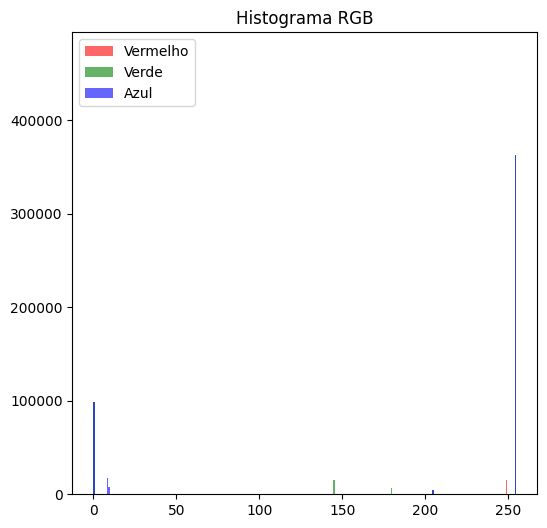

In [55]:
def rgb_histogram(img):
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    plt.figure(figsize=(6, 6))

    plt.hist(r.ravel(), bins=256, color="red", alpha=0.6, label="Vermelho")
    plt.hist(g.ravel(), bins=256, color="green", alpha=0.6, label="Verde")
    plt.hist(b.ravel(), bins=256, color="blue", alpha=0.6, label="Azul")

    plt.title("Histograma RGB")
    plt.legend()
    plt.show()


rgb_histogram(img_favorite)

### Conversão para que todos os pixels abaixo do trashold sejam pintados na cor favorita 

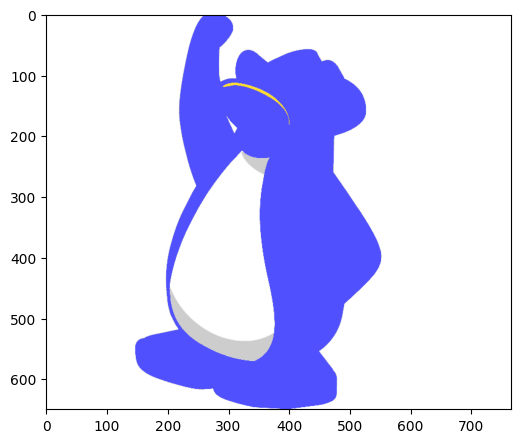

In [56]:
def second_change_Color(img):
    color = np.array([80, 80, 255])
    new_image = img.copy()

    threshold = 165  # valor de limiar para a escala de cinza
    imgGray = np.mean(img, axis=-1)  # escala de cinza
    mask = imgGray < threshold
    new_image[mask] = color

    plt.figure(figsize=(6, 6))
    plt.imshow(new_image)


second_change_Color(img_favorite)